In [23]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import sklearn.metrics

'''
IRIS plant data 

Attribute Information:
   1. sepal length in cm
   2. sepal width in cm
   3. petal length in cm
   4. petal width in cm
   5. class: 
      -- Iris Setosa
      -- Iris Versicolour
      -- Iris Virginica
      
'''

In [24]:
#Load Iris Dataset
column_names=["sepal_length","sepal_width","petal_length","petal_width","class"]
iris=pd.read_csv("../data/iris.csv",names=column_names)
iris.head(5)

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [25]:
X=iris[["sepal_length","sepal_width","petal_length","petal_width"]]
Y=iris[["class"]]

In [26]:
X_train, X_test, Y_train,Y_test  =   train_test_split(X, Y, test_size=.4,random_state=40)

In [27]:
print X_train.shape
print X_test.shape

(90, 4)
(60, 4)


In [28]:
X_train.head(5)

,sepal_length,sepal_width,petal_length,petal_width
4,5.0,3.6,1.4,0.2
143,6.8,3.2,5.9,2.3
61,5.9,3.0,4.2,1.5
10,5.4,3.7,1.5,0.2
112,6.8,3.0,5.5,2.1


In [29]:
Y_train.head(5)

,class
4,Iris-setosa
143,Iris-virginica
61,Iris-versicolor
10,Iris-setosa
112,Iris-virginica


In [30]:
#Build model on training data
# classifier=DecisionTreeClassifier(criterion='entropy')
classifier=DecisionTreeClassifier()
classifier=classifier.fit(X_train,Y_train)

In [31]:
predictions=classifier.predict(X_test)
predictions

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris

In [33]:
print sklearn.metrics.confusion_matrix(Y_test,predictions)
print sklearn.metrics.accuracy_score(Y_test, predictions)



[[20  0  0]
 [ 0 20  0]
 [ 0  4 16]]
0.933333333333


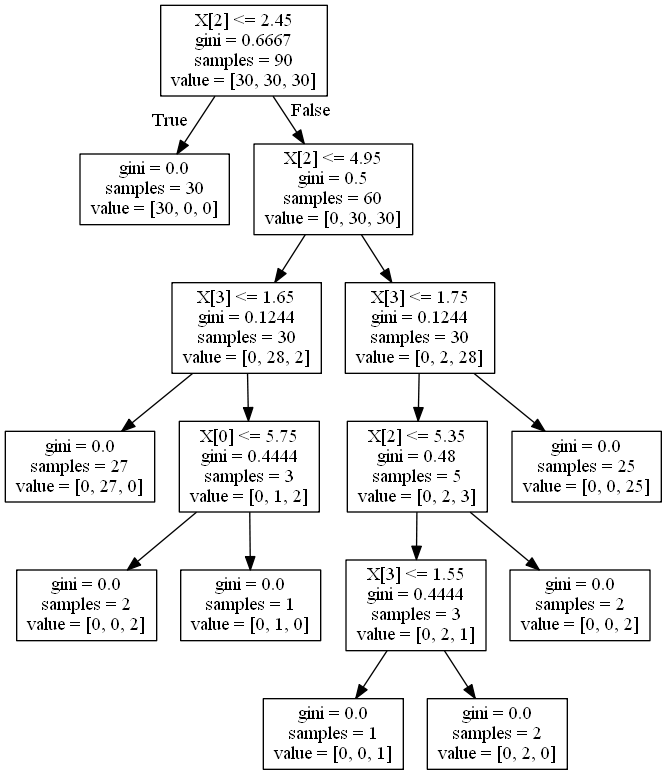

In [34]:
#Displaying the decision tree
from sklearn import tree
#from StringIO import StringIO
from io import BytesIO as StringIO
#from StringIO import StringIO 
from IPython.display import Image
out = StringIO()
tree.export_graphviz(classifier, out_file=out)
import pydotplus
graph=pydotplus.graph_from_dot_data(out.getvalue())
Image(graph.create_png())
